In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline

# Методы одномерной оптимизации

Задача оптимизации функции заключается в поиске ее минимума или максимума.
Максимизации функции $f(x)$ эквивалентна минимизации $-f(x)$, поэтому достаточно рассматривать только одну из этих задач.
Итак, пусть требуется найти 
$$
\min f(x), \qquad \mbox{где $a\le x \le b$}
$$


## 1. Некоторые методы

### 1.1. Метод золотого сечения

Пусть функция $f(x)$ на отрезке $[a,b]$ *унимодальна*, т.е. имеет единственную точку минимума $x^*$ и убывает на отрезке $[a,x^*]$ и возрастает на $[x^*,b]$.
Выберем некоторые две точки $x_1$ и $x_2$ на отрезке $[a,b]$, причем $x_1 < x_2$.
Если $f(x_1)< f(x_2)$, то ясно, что точка минимума находится на отрезке $[a,x_2]$, тем самым свели задачу поиска точки минимума к меньшему отрезку.

<img src="https://studfile.net/html/2706/297/html_OxZSXTVw5n.niFf/img-zF_R8m.png">

Если $f(x_1)> f(x_2)$, то точка минимума находится на отрезке $[x_1,b]$ - снова свели задачу к поиску точки минимума на меньшем отрезке. 



<img src="https://studfile.net/html/2706/297/html_OxZSXTVw5n.niFf/img-mtTwuQ.png">

Всякий раз на новом отрезке выбираем две внутренних точки, в которых вычисляем $f(x)$ и повторяем рассуждения.

Заметим, что оба раза новый отрезок уже содержит одну внутреннюю точку, в которой $f(x)$ уже вычислено: для $[a,x_2]$ - это $x_1$, а для $[x_1,b]$ - это $x_2$. Поэтому достаточно найти значение функции еще в одной точке.

Давайте выбирать точки $x_1$, $x_2$ симметрично относительно центра и так, чтобы на каждой итерации они делили отрезок в одном и том же соотношении $\tau$. Итак, точка $x_1$ должна делить отрезок $[a,b]$ в том же отношении $\tau$, что точка $x_2$ делит отрезок $[x_1, b]$. Аналогично, точка $x_2$ должна делить отрезок $[a,b]$ в том же отношении $\tau$, что точка $x_1$ делит отрезок $[a, x_2]$.

<img src="https://www.semestr.ru/images/math/optim/golden-image002.jpg">

Тогда получаем

$$
\frac{1-\tau}{\tau} = \tau,
$$
откуда
$$
\tau^2 + \tau - 1 = 0
$$

$$
\tau_{1,2} = \frac{-1\pm\sqrt{5}}{2}
$$

$$
\tau = \frac{\sqrt{5} - 1}{2} = \frac{1}{\frac{1+\sqrt{5}}{2}} = \frac{1}{\varphi} = 1 - \varphi.
$$
Число
$$
\varphi = \frac{1+\sqrt{5}}{2} = 1.618033988749895\dots
$$
называется *золотым сечением*.



In [2]:
(1+5**(1/2))/2, (-1+5**(1/2))/2

(1.618033988749895, 0.6180339887498949)

### 1.2. Метод Ньютона

Пусть $f(x)$ имеет непрерывную вторую производную.
Тогда в точке минимума $x^*$ и в некоторой ее окрестности функция $f(x)$ должна быть выпуклой вниз, поэтому $f''(x^*)>0$.
Рассмотрим начальный отрезок разложения в ряд Тейлора функции $f(x)$ в точке $x_k$:

$$
f(x) \approx f(x_k) + f'(x_k) (x-x_k) + \frac{1}{2} f''(x_k) (x-x_k)^2
$$
График 
$$
\varphi(x) = f(x_k) + f'(x_k) (x-x_k) + \frac{1}{2} f''(x_k) (x-x_k)^2
$$ 
- это график *касательной параболы* к $f(x)$ в точке $x_k$.

На $k$-й итерации будем находить минимум функции $\varphi(x)$ 
$$
f(x_k) + f'(x_k) (x-x_k) + \frac{1}{2} f''(x_k) (x-x_k)^2.
$$
Если $f''(x_k) > 0$, то минимум достигается в единственной точке
$$
x_{k+1} = x_k - \frac{f'(x_k)}{f''(x_k)}.
$$
Эту точку и возьмем в качестве $x_{k+1}$.

<img src="http://www.nsc.ru/rus/textbooks/akhmerov/mo/images/09.gif">


Заметим, что метод Ньютона для решения задачи минимизации функции - эквивалентен методу Ньютона для решения нелинейного уравнения, примененного к уравнению
$$
f'(x) = 0.
$$

### 1.3.  Метод квадратичной интерполяции

По точкам $\bigl(x_{k-2}, f(x_{k-2})\bigr)$, $\bigl(x_{k-1}, f(x_{k-1})\bigr)$, $\bigl(x_k, f(x_k)\bigr)$ строим интерполяционный квадратичный интерполянт
$$
g(x) = 
 f(x_{k-2})\frac{(x-x_{k-1})(x-x_k)}{(x_{k-2}-x_{k-1})(x_{k-2}-x_k)}
+f(x_{k-1})\frac{(x-x_{k-2})(x-x_k)}{(x_{k-1}-x_{k-2})(x_{k-2}-x_k)}
+f(x_k)    \frac{(x-x_{k-2})(x-x_{k-1})}{(x_k-x_{k-2})(x_k-x_{k-1})}
$$

В качестве $x_{k+1}$ берем точку минимума этого многочлена:
$$
x_{k+1} = \frac{1}{2}\cdot
\frac{(x_{k-1}^2 - x_k^2)f(x_{k-2}) + (x_k^2 - x_{k-2}^2)f(x_{k-1}) + (x_{k-2}^2 - x_{k-1}^2) f(x_k)}{(x_{k-1} - x_k)f(x_{k-2}) + (x_k - x_{k-2})f(x_{k-1}) +  (x_{k-2} - x_{k-1}) f(x_k)}
$$

### 1.4. Метод Брента

Метод Брента использует комбинацию метода золотого сечения и квдартичной инттерполяции.

Не следует путать этот метод с методом того же атвора для решения нелинейного уравнения.



## 2. Методы одномерной оптимизации из модуля `optimize`

"Общая" функция, реализующая методы одномерной оптимизации - `minimize_scalar`.
Конкретный метод в ней можно задать определив значение параметра `method`.

In [3]:
from scipy.optimize import minimize_scalar

In [4]:
def f(x):
    return x**6 + 7*x**4 - 2*x

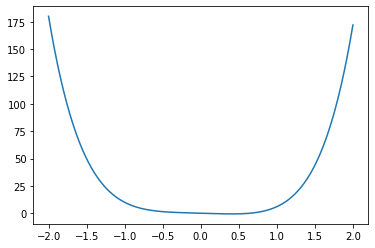

In [5]:
xx = np.linspace(-2, 2, 200)
yy = f(xx)
plt.plot(xx, yy)
pass

In [6]:
minimize_scalar(f, bracket=[-2,2], method='golden')

     fun: -0.6174466420454399
    nfev: 48
     nit: 43
 success: True
       x: 0.4100466458688272

In [7]:
minimize_scalar(f, bracket=[-2,2], method='brent')

     fun: -0.6174466420454399
    nfev: 18
     nit: 14
 success: True
       x: 0.41004664550417785

In [11]:
minimize_scalar(f, bounds=[-2, 2], method='bounded')

     fun: -0.6174466420387144
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: 0.410045697611525

Методы `golden` и `brent` могут выскочить за границы интервала, на котором ищется минимум.
Если мы ищем минимум функции на отрезке, то в этом случае необходимо использовать метод `bounded`
Например, рассмотрим следующую функцию

In [8]:
def f2(x):
    return (x**3)+(x**2)+x-2

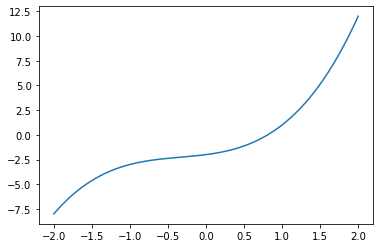

In [9]:
xx = np.linspace(-2, 2, 200)
yy = f2(xx)
plt.plot(xx, yy)
pass

In [10]:
minimize_scalar(f2, bounds=[-2, 2], method='bounded')

     fun: -7.999949342096109
 message: 'Solution found.'
    nfev: 28
  status: 0
 success: True
       x: -1.999994371326411